In [1]:
import sys, os
sys.path.append("../main")
import ZI
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('dark_background')

# Simulazioni con il modello ZI

La funzione principale della libreria ZI è sim_LOB.

I parametri della funzione sono:

- l_rate (float):
    - Rate di arrivo dei limit orders per unità di tempo e per prezzo.
    
- m_rate (float):
    - Rate di arrivo dei market orders.
    
- c_rate (float):
    - Rate probabilità di cancellazione di un ordine.
    
- m0 (int): default = 0
    - Mid price iniziale da cui far partire le simulazioni.
    
- k (int) default = 100
    - Grandezza LOB. Per motivi di velocità computazionale bisogna tagliare il LOB ad una certa distanza dal mid price. In generale bisogna scegliere un valore di k almeno 10 volte più grande dello spread medio.
    
- iterations (int) default = 10_000:
    - Numero di iterazioni della simulazione.
    
- burn (int) default = None:
    - Numero di iterazioni iniziali da scartare. Se nessun valore viene fornito si scarta un numero di iterazioni pari a int(iterations / 3)

La funzione ritorna 2 DataFrame:

- df_m
- df_o

   

# Esempio

Dopo aver ricavato i valori di $\lambda$, $\mu$, $\delta$ da dati TSLA, faccio partire la simulazione con il modello ZI.

Visto che lo spread medio di TSLA è di $\sim$ 20 tick uso come valore di k 200.


In [2]:
#parametri ricavati da TSLA
rate_lim = 0.023
rate_m   = 0.062
rate_del = 0.109

#faccio partire una simulazione con 50_000 iterazioni utilizzando
# i parametri ricavati da TSLA
message, order = ZI.sim_LOB(rate_lim, rate_m, rate_del, m0 = 22_500,  k = 200, 
                                iterations = 50_000)


Il primo dataframe (o anche message dataframe) contiene le seguenti informazioni:

- Spread (int)
    - Il bid-ask spread subito dopo l'arrivo di un ordine espresso in tick.
- MidPrice (int)
    - Il mid price subito dopo l'arrivo di un ordine espresso in tick.
- Price (int)
    - Il prezzo di un ordine espresso in tick.
- Type {"Limit", "Market", "Cancel"}
    - Il tipo di un ordine.
- Sign {-1, 1}
    - Il segno di un ordine (-1 = sell, +1 = buy).

In [3]:
message.head()

,Spread,MidPrice,Price,Type,Sign
0,17.0,22599.5,22585.0,Cancel,1.0
1,17.0,22599.5,22674.0,Limit,-1.0
2,17.0,22599.5,22677.0,Limit,-1.0
3,17.0,22599.5,22558.0,Limit,1.0
4,17.0,22599.5,22569.0,Cancel,1.0


Il secondo dataframe (order dataframe) contiene il prezzo e il volume delle 10 migliori quote dell'ask e del bid.

In [4]:
order.head()

,AskPrice_0,AskVolume_0,BidPrice_0,BidVolume_0,AskPrice_1,AskVolume_1,BidPrice_1,BidVolume_1,AskPrice_2,AskVolume_2,...,BidPrice_7,BidVolume_7,AskPrice_8,AskVolume_8,BidPrice_8,BidVolume_8,AskPrice_9,AskVolume_9,BidPrice_9,BidVolume_9
0,22608.0,1.0,22591.0,1.0,22615.0,1.0,22583.0,1.0,22625.0,1.0,...,22533.0,1.0,22690.0,1.0,22532.0,1.0,22500.0,0.0,22526.0,1.0
1,22608.0,1.0,22591.0,1.0,22615.0,1.0,22583.0,1.0,22625.0,1.0,...,22533.0,1.0,22690.0,1.0,22532.0,1.0,22500.0,0.0,22526.0,1.0
2,22608.0,1.0,22591.0,1.0,22615.0,1.0,22583.0,1.0,22625.0,1.0,...,22533.0,1.0,22677.0,1.0,22532.0,1.0,22690.0,1.0,22526.0,1.0
3,22608.0,1.0,22591.0,1.0,22615.0,1.0,22583.0,1.0,22625.0,1.0,...,22536.0,1.0,22677.0,1.0,22533.0,1.0,22690.0,1.0,22532.0,1.0
4,22608.0,1.0,22591.0,1.0,22615.0,1.0,22583.0,1.0,22625.0,1.0,...,22536.0,1.0,22677.0,1.0,22533.0,1.0,22690.0,1.0,22532.0,1.0


Possiamo usare i due dataframe per graficare l'andamento del mid price

<AxesSubplot:>

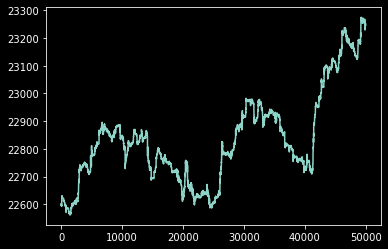

In [5]:
message["MidPrice"].plot()

Per fare l'istogramma del bid-ask spread

<AxesSubplot:>

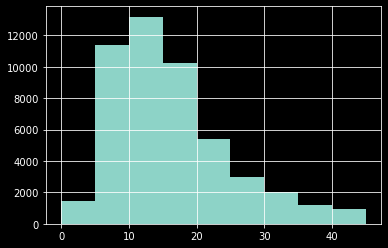

In [6]:
message["Spread"].hist(bins=np.arange(0,50,5))

Per fare un grafico a barre del tipo degli ordini

<AxesSubplot:>

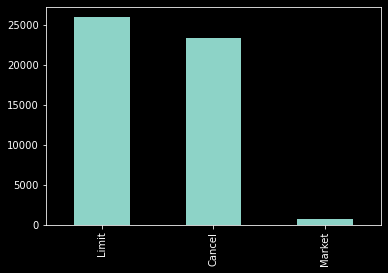

In [7]:
message["Type"].value_counts().plot.bar()